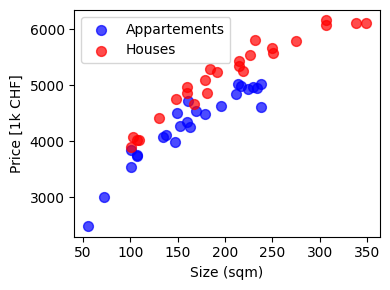

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from utils import load_house_data, plot_housing_data_classified, \
    animate_logistic_regression, plot_fit_landscape_and_loss

sizes, prices, labels = load_house_data('data/housing_prices.txt')

plot_housing_data_classified(sizes, prices, labels)

In [4]:
# Scale the input features (as in the previous exercise)
size_scaled = (sizes - np.mean(sizes)) / np.mean(sizes)
price_scaled = (prices - np.mean(prices)) / np.mean(prices)

# Create feature list: [size, price, size^2, price^2]
# (use the scaled features!)
####### YOUR CODE HERE #######
features = [
    size_scaled,           # Feature 0: size
    price_scaled,          # Feature 1: price  
    size_scaled**2,      # Feature 2: size^2
    price_scaled**2      # Feature 3: price^2
]
####### END YOUR CODE ########

# Convert to numpy array for easier computation
# (We also need to transpose the array))
feature_matrix = np.array(features).T

feature_names = ['size', 'price', 'size²', 'price²']
    

In [7]:
pip install matplotlib==3.8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 136.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 135.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6━━━━━━ 0/2 [numpy]
  Attempting uninstall: matplotlib━━━━━━━━━━━━━━ 0/2 [numpy]
    Found existing installation: matplotlib 3.10.30/2 [numpy]
    Uninstalling matplotlib-3.10.3:━━━━━━━━━ 0/2 [numpy]
      Successfully uninstalled matplotlib-3.10.3━━━━━━━━━━━━━━━━━━ 1/2 [matplotlib]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [matplotlib]2 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


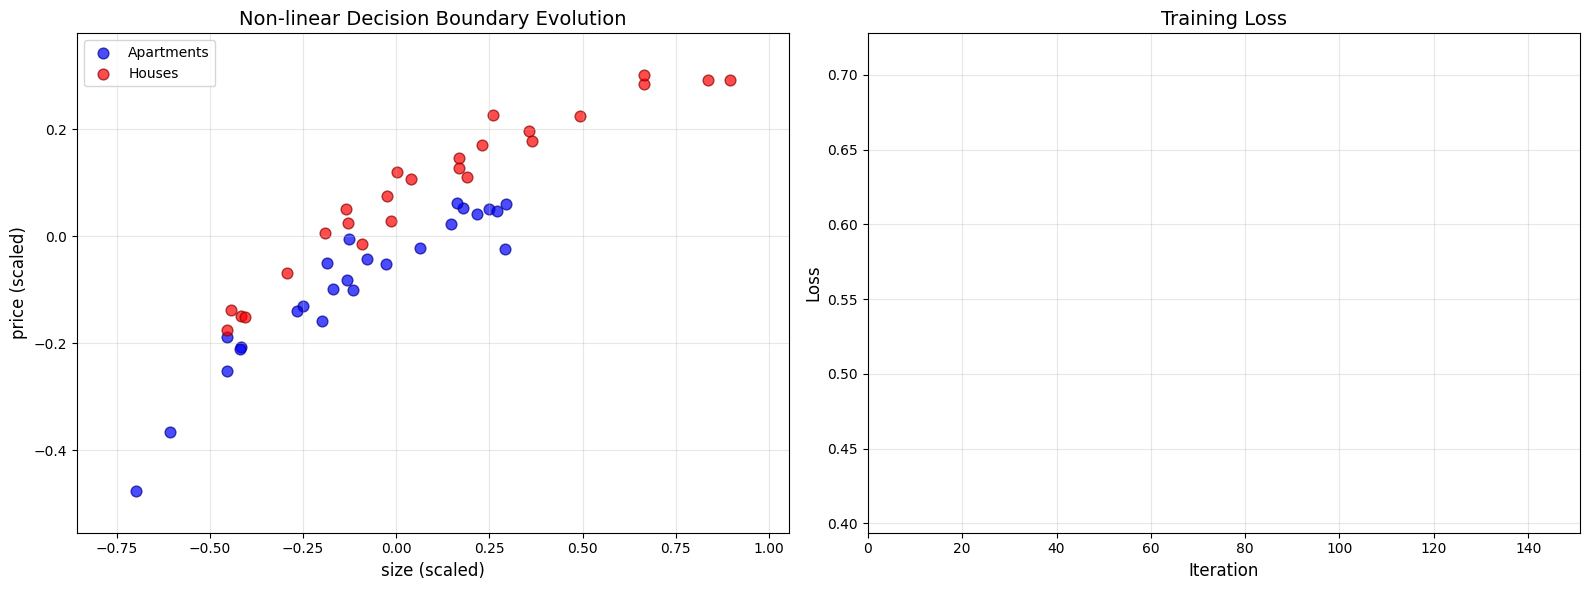

AttributeError: 'QuadContourSet' object has no attribute 'collections'

In [11]:
def sigmoid(z):
    """Sigmoid activation function"""
    # To prevent overflow in the exponential function, we clip z
    z = np.clip(z, -500, 500)
    ####### YOUR CODE HERE #######
    return 1 / (1 + np.exp(-z))
    ####### END YOUR CODE ########


def calculate_logistic_loss(weights, bias, feature_matrix, labels):
    """Calculate logistic loss for any number of features"""
    # Linear combination: z = w1*x1 + w2*x2 + ... + wn*xn + b

    # Calculate the linear combination
    # Recall: the linear combination is z = w1*x1 + w2*x2 + ... + wn*xn + b
    # where weights is a vector of shape (n_features,) and features is a matrix of shape (n_samples, n_features).
    # The bias is a scalar.
    # we can use np.dot to compute the dot product between features and weights, and then add the bias.
    # this results in a vector z of shape (n_samples,).
    z = np.dot(feature_matrix, weights) + bias

    # Apply the sigmoid function to get predictions
    ##### YOUR CODE HERE #######
    y_pred = sigmoid(z)
    ####### END YOUR CODE ########
    
    # clip to avoid log(0) issues
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    y = labels
    # Implement the binary cross-entropy loss
    # Recall: L = -(1/N) * Σ [y * log(y_pred) + (1 - y) * log(1 - y_pred)]
    ##### YOUR CODE HERE #######
    loss = -np.mean( [y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)])
    ####### END YOUR CODE ########
    return loss


def gradient_descent_logistic(feature_matrix, labels, learning_rate=0.05, n_iterations=150):
    """Perform gradient descent for logistic regression with any number of features"""
    n_features = feature_matrix.shape[1]
    
    # Initialize parameters
    weights = np.zeros(n_features)
    bias = 0.0
    
    # Store training history
    weights_history = [weights.copy()]
    bias_history = [bias]
    loss_history = [calculate_logistic_loss(weights, bias, feature_matrix, labels)]
    
    for i in range(n_iterations):
        # Forward pass
        # Calculate the linear combination
        z = np.dot(feature_matrix, weights) + bias

        # Apply the sigmoid function to get predictions
        ##### YOUR CODE HERE #######
        y_pred = sigmoid(z)
        ####### END YOUR CODE ########

        # Calculate gradients
        error = y_pred - labels
        weight_gradients = np.dot(feature_matrix.T, error) / len(labels)
        bias_gradient = np.mean(error)
        
        # Update parameters
        ####### YOUR CODE HERE #######
        weights -= learning_rate*weight_gradients
        bias -=  learning_rate*bias_gradient
        ####### END YOUR CODE ########
        
        # Store history
        weights_history.append(weights.copy())
        bias_history.append(bias)
        current_loss = calculate_logistic_loss(weights, bias, feature_matrix, labels)
        loss_history.append(current_loss)
    
    return np.array(weights_history), np.array(bias_history), np.array(loss_history)


weights_history, bias_history, loss_history = gradient_descent_logistic(
    feature_matrix, labels, learning_rate=5.0, n_iterations=150
)
        
# Create animation
anim = animate_logistic_regression(
    feature_matrix, labels, weights_history, bias_history, loss_history, feature_names,
    # save_path="output/nonlinear_logistic_regression.mp4"
)

from IPython.display import HTML
HTML(anim.to_jshtml())
